# **TP05:ANN Réseaux de Neurones Artificiels**

**Les Réseaux de neurones artificiels** est un système d'aprentissage dont la conception est à l'origine schématiquement inspirée du fonctionnement des neurones biologiques, et qui par la suite s'est rapproché des méthodes statistiques. 

## **Partie I**: Réseaux de neurones avec sklearn 

# **I-Perceptron Linéaire avec la méthode de descente du gradiant**

L'Objectif de cette exercice est de classifier de nouvelles plantes en se basant sur un ensemble de données des plantes toxiques (Y=1) et non toxiques (Y=0).

La classification selon deux variables:

 $x_1$: la largeur de la plante 

 $x_2$: la longueur de la plante.


**Q1-**Utilisez la fonction make_blobs(n_samples,centers, cluster_std,random_state) du module sklearn.datasets pour generer deux classes puis visualiser ces classes
*   rouge: y=0 (non toxique)
*   blue: y=1 (toxique)


In [73]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

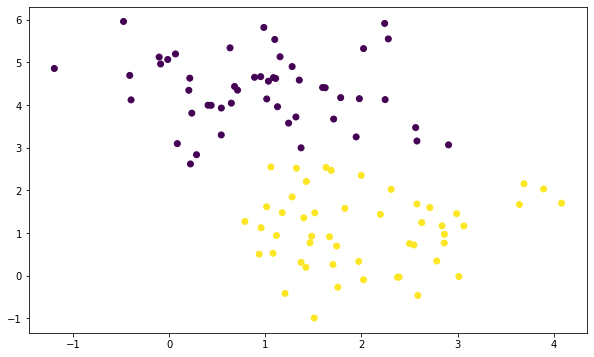

In [74]:
X,y = make_blobs(n_samples=100, centers=2,cluster_std=0.85, random_state=0)

plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1], c=y)

**Q2** 

a) Afficher la matrice X, corriger les dimension de Y. 

b) Créer un fonction pour initialiser aléatoirement les poids W et le biais b.

c) Ecrire le modèle $Z=X.W+b ; \quad A=\frac{1}{1+\exp(-Z)}$
 
d) Ecrire la ***Fonction du coût***:$J=-\frac{1}{m}\sum y\log(A)+(1-y) \log(1-A)$
 
e) Ecrire un script qui définit la fonction du gradiant $$ \frac{\delta J}{\delta W}=\frac{1}{m}X^T.(A-y);  \quad \frac{\delta J}{\delta b}=\frac{1}{m} \sum (A-y) $$
 
f) Implementer la descente de gradient en utilisant de gradiant:
$$ W\leftarrow W- \alpha\frac{\delta J}{\delta W}$$
$$ b\leftarrow b- \alpha\frac{\delta J}{\delta b}$$
 
g) Trouver les meilleurs valeurs de $W$ et $b$ pour un learning rate $\alpha=0.1$ et un nombre d'itérations de $100$

h) Utiliser  disponible comme méthode dans le module sklearn.metrics pour calculer le score du modèle



In [75]:
import numpy as np

In [76]:
y = y.reshape(-1,1)
print(X.shape, y.shape)

(100, 2) (100, 1)


In [77]:
def init():
  return np.random.random((2,1)), np.random.randn()

In [78]:
def model(x,w,b):
  z = x.dot(w) + b
  return 1 / (1 + np.exp(-z))

In [79]:
def cost(y,a):
  m = -1/len(y)
  e = 1e-15
  return m*np.sum(y*np.log(a +e) +(1-y)*np.log(1-a +e))

In [80]:
def gradient(x,y,a):
  m = 1/len(y)
  dw = m*X.T.dot(a-y)
  db = m*np.sum(a-y)
  return dw, db

In [81]:
def gradient_descent(w,b,dw,db,l_rate):
  return w-l_rate*dw, b-l_rate*db

In [82]:
def artificial_neuron(x,y,l_rate=0.1,n_iter=100):
  w,b = init()
  loss_hist = []

  for i in range(n_iter):
    a = model(x,w,b)
    loss_hist.append(cost(y,a))
    dw,db = gradient(x,y,a)
    w,b = gradient_descent(w,b,dw,db,l_rate)

  plt.figure(figsize=(7,4))
  plt.plot(loss_hist)
  plt.title("Log-Loss")
  plt.show()

  return w,b

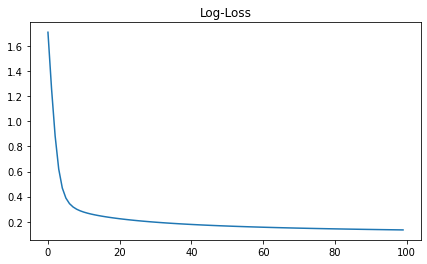

In [83]:
w,b = artificial_neuron(X,y)

In [84]:
def perdict(x,w,b):
  a = model(x,w,b)
  return (a >= 0.5).astype(int)

In [85]:
from sklearn.metrics import accuracy_score

y_pred = perdict(X,w,b)
accuracy_score(y, y_pred)

0.97

**Q3-Tracer la Frontiere de décision**

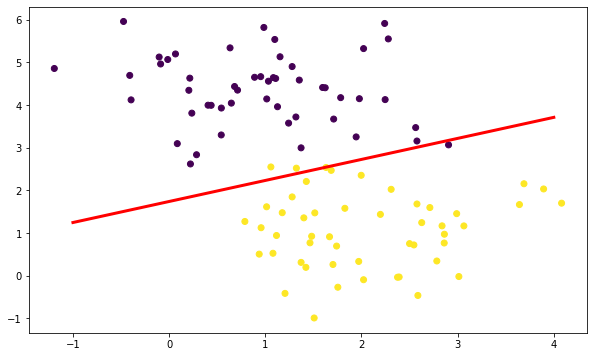

In [86]:
x1 = np.linspace(-1,4,100)
x2 = (-b - x1*w[0]) / w[1]
plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1], c=y)
plt.plot(x1,x2,c='r', lw=3)

### Q3. Prédiction

A quelle classe apartient les deux plantes suivantes: (2,1); (0,5) 

In [87]:
p1 = np.array([2,1])
p2 = np.array([0,5])

predict_p1 = perdict(p1,w,b)
predict_p2 = perdict(p2,w,b)

print('plante(1) de classe :',predict_p1[0])
print('plante(2) de classe :',predict_p2[0])

plante(1) de classe : 1
plante(2) de classe : 0


# II-**Perceptron Multicouche**


Q1
1- Construire un Dataframe ***data*** contenant les données stoker dans le fichier ***diabetes.csv*** 

2- Visualiser ce dataframe ainsi que les différentes mesure sur ce dataframe

In [88]:
import pandas as pd

In [90]:
data = pd.read_csv('diabetes.csv')
data.head()

Pregnancies  Glucose  BloodPressure  ...  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72  ...                     0.627   50        1
1            1       85             66  ...                     0.351   31        0
2            8      183             64  ...                     0.672   32        1
3            1       89             66  ...                     0.167   21        0
4            0      137             40  ...                     2.288   33        1

[5 rows x 9 columns]

#### Q2. Selection des caractéristiques
Créer les deux dataframes:
- X: le dataframe des entrée (['Age', 'BloodPressure','Glucose', 'Insulin', 'BMI']) 
- y: la sortie (outcome)

In [91]:
X = data[['Age', 'BloodPressure','Glucose', 'Insulin', 'BMI']]
y = data[['Outcome']]

#### Q3. Partitionner ces données en X_train, X_test, y_train, y_test

In [92]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2)
y_train.shape

(614, 1)

#### Q4. Création, entrainement et évaluation du modèle
1. Utiliser le classifieur ***MLPClassifier*** du module ***sklearn.neural_network*** pour initialiser et entrainer trois perceptrons:
- avec une seule couche cachée de 8 neurones
- avec deux couches cachées de (8,16) neurones
- avec trois couches cachées.

2. Afficher la matrice de confusion de ce modèle

In [93]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


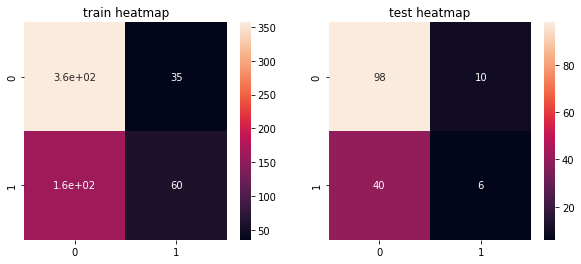

In [94]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(8,), activation='logistic', alpha=1e-5, max_iter=1000)
clf.fit(X_train, y_train)
train_pred = clf.predict(X_train)
test_pred = clf.predict(X_test)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_train, train_pred), annot=True)
plt.title("train heatmap")

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test, test_pred), annot=True)
plt.title("test heatmap")
plt.show()

#### Q5. utilisation du modèle

Mr Rachid a fait un bilon et a obtenu les resu Après un bilon Mr

    Age: 22
    Glucose: 79
    BloodPressure: 69
    Insulin: 31
    BMI: 0.4

Mr Rachid a-t-il un diabéte?

In [95]:
rachid = np.array([22,69,79,31,0.4]).reshape(1,5)
clf.predict(rachid)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([0])

## **Partie II**: Réseaux de neurones avec tensorflow et kearas
-Reconnaissance de chiffres(handwritten digit recognition)

Le module Python tensorflow est très puissant pour l’apprentissage automatique. Le module keras a
été élaboré pour pouvoir utiliser tensorflow plus simplement.
Nous profitons de la librairie tensorflow/keras qui en
quelques lignes nous permet d’importer des données, de construire un réseau de neurones à plusieurs
couches, d’effectuer une descente de gradient et de valider les résultats. 

Objectif de cette exercice est de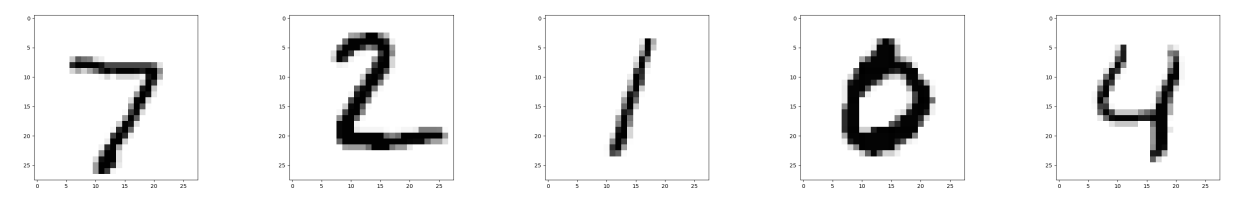reconnaître de façon automatique des chiffres écrits à la main.

### 1-**Dataset**

Q1- Utiliser la base "mnist" de tensorflow.keras.datasets pour importer les données.

 Plus en détails :

• La base mnist est formée de 60 000 données d’apprentissage et de 10 000 données de test.
• Chaque donnée est de la forme : [une image, le chiffre attendu].

• Chaque image est de taille 28×28 pixels, chaque pixel contenant un des 256 niveaux de gris (numérotés
de 0 à 255).

Ces données sont accessibles très simplement avec tensorflow/keras :

In [96]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [97]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()
print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)


**Donnée d’entrée.**

 En entrée du réseau de neurones, nous devons avoir un vecteur. Au départ chaque image
est un tableau de taille 28 × 28 ayant des entrées entre 0 et 255. Nous la transformons en un vecteur de
taille $784 = 28^2$

et nous normalisons les données dans l’intervalle [0, 1] (en divisant par 255).

Ainsi, une entrée X est un « vecteur-image », c’est-à-dire un vecteur de taille 784 représentant une image.

**Donnée de sortie.**

Notre réseau de neurones ne va pas renvoyer le chiffre attendu, mais une liste de 10
probabilités. Ainsi chaque chiffre doit être codé par une liste de 0 et de 1.
• 0 est codé par (1, 0, 0, 0, 0, 0, 0, 0, 0, 0),

• 1 est codé par (0, 1, 0, 0, 0, 0, 0, 0, 0, 0),

• 2 est codé par (0, 0, 1, 0, 0, 0, 0, 0, 0, 0),

• . . .

• 9 est codé par (0, 0, 0, 0, 0, 0, 0, 0, 0, 1).

**Fonction.**
Nous cherchons une fonction $F : R^{784} → R^{10}$, qui à un vecteur-image associe une liste de probabilités, telle que F(Xi) ' Yi pour nos données transformées (Xi, Yi), i = 1, . . . , 60 000.

Par exemple la fonction F, évaluée sur un vecteur-image X peut renvoyer
F(X) = (0.01, 0.04, 0.03, 0.01, 0.02, 0.22, 0.61, 0.02, 0.01, 0.01, 0.02).

Dans ce cas, le nombre le plus élevé est 0.61 au rang 6, cela signifie que notre fonction F prédit le chiffre 6 avec une probabilité de 61%, mais cela pourrait aussi être le chiffre 5 qui est prédit à 22%. Les autres chiffres sont peu probables.


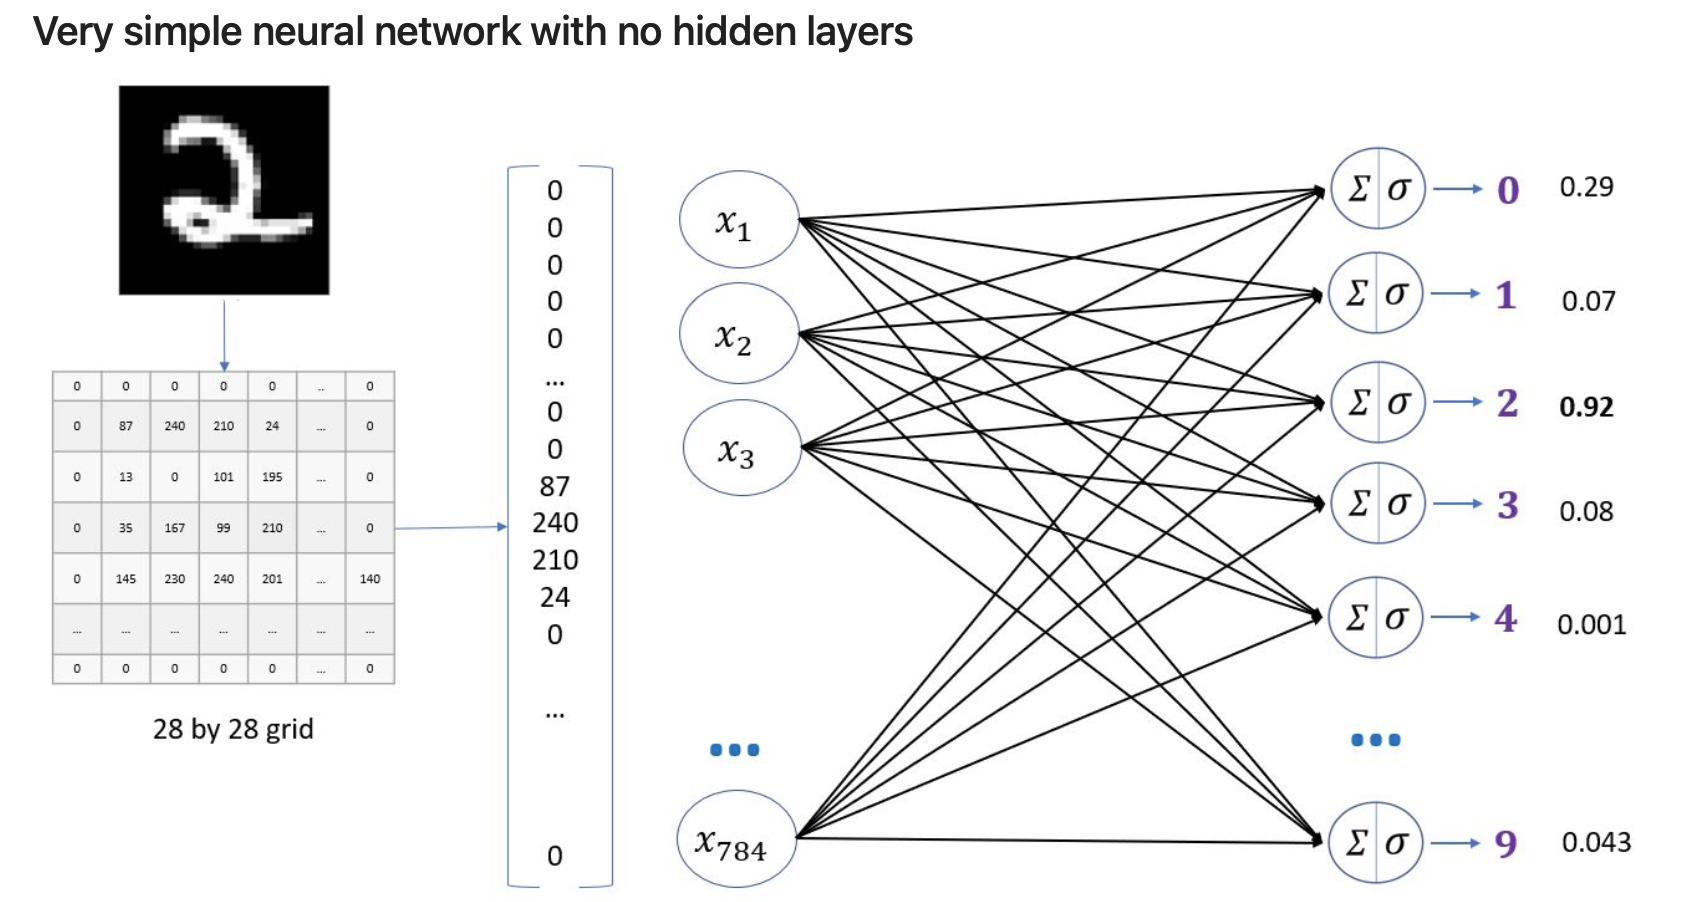

**Q_2** Redimensioner X et normaliser les données

In [98]:
x_train = x_train.reshape(x_train.shape[0],-1)
x_test = x_test.reshape(x_test.shape[0],-1)
print(x_train.shape, x_test.shape)

(60000, 784) (10000, 784)


In [99]:
x_train = x_train / 255.0
x_test = x_test / 255.0

**Q_3** Catégoriser les Données d'apprentissage Y vers une liste de taille 10

In [100]:
y_train = to_categorical(y_train,num_classes=10, dtype='int')

**Q3** Construisez un réseau de neurones qui produira une fonction F : R^{784} → R^{10}$ L’architecture est
composée de 3 couches. 

En entrée nous avons un vecteur de taille 784. La première et la seconde couches
sont composées chacune de p = 8 neurones ( Fonction d'activation sigmoid). La couche de sortie (est formée de 10 neurones, un pour chacun
des chiffres.

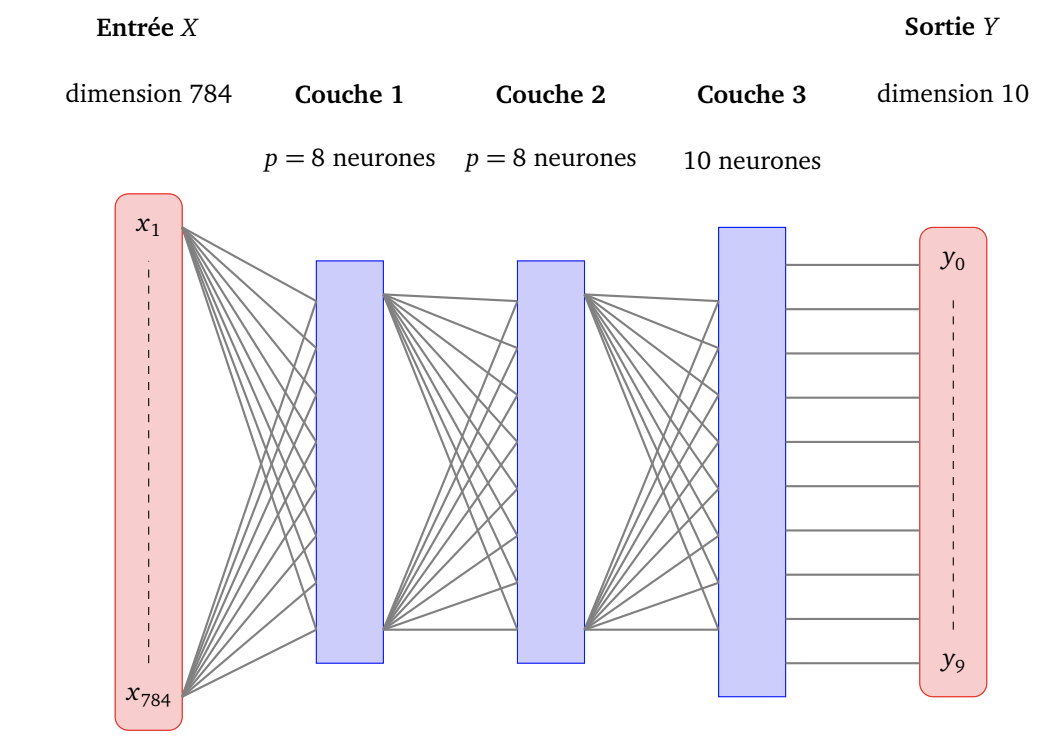

In [101]:
from keras.models import Sequential
from keras.layers import Dense

In [102]:
model = Sequential()
model.add(Dense(8, activation='sigmoid'))
model.add(Dense(8, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

In [103]:
model.compile(optimizer='sgd',loss='categorical_crossentropy', metrics=['accuracy'])

**Q4-Entrainer et Evaluer le modèle  **

In [104]:
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
1875/1875 [==============================] - 6s 3ms/step - loss: 2.2982 - accuracy: 0.1345
Epoch 2/50
1875/1875 [==============================] - 4s 2ms/step - loss: 2.2193 - accuracy: 0.2403
Epoch 3/50
1875/1875 [==============================] - 5s 3ms/step - loss: 2.0650 - accuracy: 0.3282
Epoch 4/50
1875/1875 [==============================] - 4s 2ms/step - loss: 1.8510 - accuracy: 0.3687
Epoch 5/50
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6571 - accuracy: 0.3997
Epoch 6/50
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5110 - accuracy: 0.4421
Epoch 7/50
1875/1875 [==============================] - 3s 2ms/step - loss: 1.3954 - accuracy: 0.5218
Epoch 8/50
1875/1875 [==============================] - 3s 2ms/step - loss: 1.2893 - accuracy: 0.5926
Epoch 9/50
1875/1875 [==============================] - 3s 2ms/step - loss: 1.1897 - accuracy: 0.6341
Epoch 10/50
1875/1875 [==============================] - 3s 2ms/step - loss: 1.100

Q5-Prédiction 
Pour une donnée particulière, comparez le chiffre prédit et le chiffre attendu.

In [105]:
import matplotlib.pyplot as plt

In [106]:
predictions = model.predict(x_test)


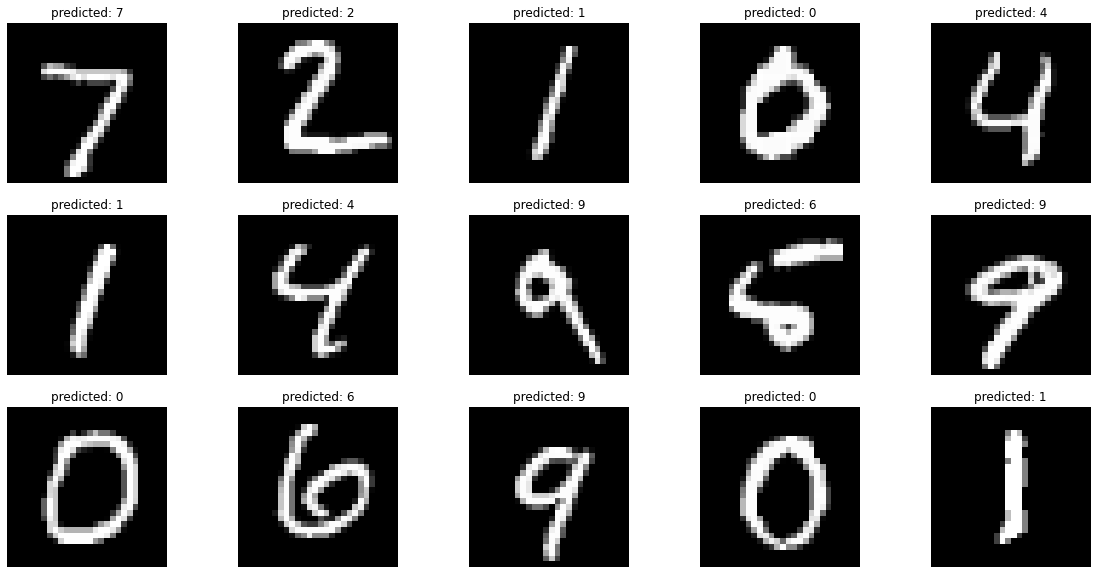

In [107]:
predictions = model.predict(x_test)

plt.figure(figsize=(20,10))
for i in range(15):
  plt.subplot(3,5,i+1)
  plt.imshow(x_test[i].reshape(28,28), cmap='gray')
  pred = predictions[i].argmax()
  plt.title("predicted: {}".format(pred))
  plt.axis('off')

plt.show()